In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [3]:
df = pd.read_csv('../../results_summary/all_snpgenie_population_summary.csv')

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split('p').str[-1].astype(int)

In [4]:
# get parental values
p0_dcv_pi = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi'].values[0]
p0_dcv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_coding'].values[0]
p0_dcv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_noncoding'].values[0]

# get parental values
p0_crpv_pi = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi'].values[0]
p0_crpv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_coding'].values[0]
p0_crpv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_noncoding'].values[0]

In [5]:
df = df[df['genotype']!='parental']

In [6]:
df['pi_fullgenome'] = df['pi']

df = df[['pi_fullgenome','pi_coding','pi_noncoding','genotype','rep','passage', 'virus']]

df_pop_long = pd.wide_to_long(df, stubnames="pi", 
                              sep="_", 
                              i = ['genotype','rep','passage', 'virus'], 
                              j='measure',
                              suffix=r'\w+')
df_pop_long = df_pop_long.reset_index()

In [7]:
df_pop_long.head()

,genotype,rep,passage,virus,measure,pi
0,W,a,1,DCV,fullgenome,0.000231
1,W,a,1,DCV,coding,0.000153
2,W,a,1,DCV,noncoding,0.000713
3,W,b,1,DCV,fullgenome,0.000245
4,W,b,1,DCV,coding,0.000154


/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply op

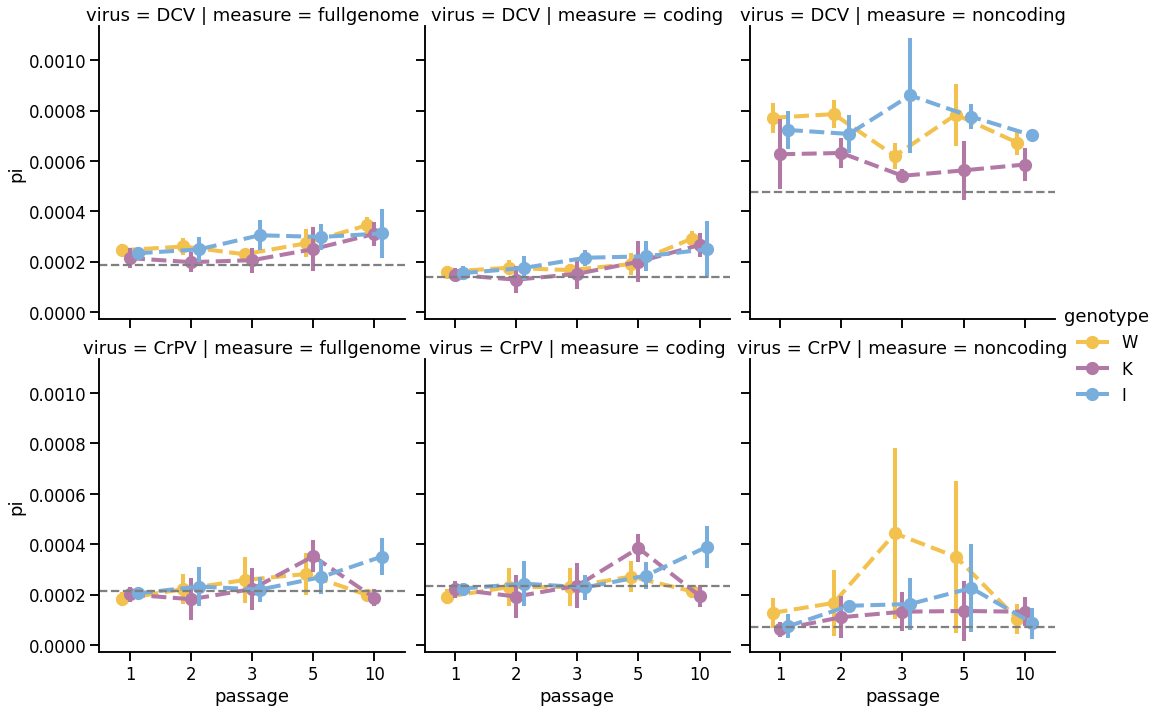

In [8]:
sns.set_context("talk") 

g = sns.catplot(df_pop_long, 
                x='passage', 
                y='pi', 
                col='measure', 
                row='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV | measure = fullgenome':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = DCV | measure = coding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi_coding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = DCV | measure = noncoding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi_noncoding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = fullgenome':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = coding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi_coding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = noncoding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi_noncoding, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.coding.noncoding.pdf")

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply op

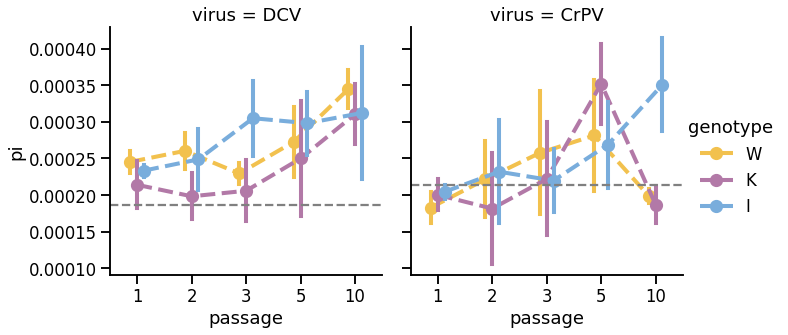

In [9]:
sns.set_context("talk") 

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome')], 
                x='passage', 
                y='pi', 
                col='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.full_genome.pdf")

In [10]:
p0_crpv_pi

0.0002143947155995

## DCV

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1200: FutureWarning: DataFrameGroupBy.apply op

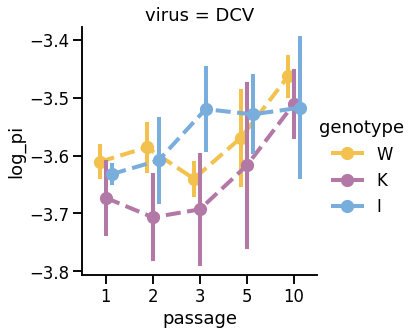

In [125]:
sns.set_context("talk") 

import numpy as np

df_pop_long['log_pi'] = np.log10(df_pop_long['pi'])

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='DCV')], 
                x='passage', 
                y='log_pi', 
                col='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
#for ax in g.axes.flat:
#    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
#        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
#        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.full_genome.pdf")

In [9]:

df_pi = df_pop_long[(df_pop_long['measure']=='fullgenome')]
df_pi['replicate'] = df_pi['virus'] + df_pi['genotype'] + df_pi['rep']

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_20354/1244348584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi['replicate'] = df_pi['virus'] + df_pi['genotype'] + df_pi['rep']


In [10]:
%load_ext rpy2.ipython

Error importing in API mode: ImportError("dlopen(/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): symbol not found in flat namespace '_R_BaseEnv'")
Trying to import in ABI mode.


In [11]:
%%R -i df_pi 

library(lme4)
library(lmerTest)
library(rstatix)
library(ggpubr)
library(ggplot2)
library(ggdist) #for stat halfeye
library(DHARMa) #THE STAR OF THE SHOW INTERPRETATION OF MODEL FIT
library(MASS)

Lade nötiges Paket: Matrix

Attache Paket: ‘lmerTest’

Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer

Das folgende Objekt ist maskiert ‘package:stats’:

    step


Attache Paket: ‘rstatix’

Das folgende Objekt ist maskiert ‘package:stats’:

    filter

Lade nötiges Paket: ggplot2
This is DHARMa 0.4.7. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa')

Attache Paket: ‘MASS’

Das folgende Objekt ist maskiert ‘package:rstatix’:

    select

Zusätzlich: Warnmeldungen:
1: Paket ‘rstatix’ wurde unter R Version 4.1.2 erstellt 
2: Paket ‘ggpubr’ wurde unter R Version 4.1.2 erstellt 
3: Paket ‘ggdist’ wurde unter R Version 4.1.2 erstellt 


In [98]:
%%R

# Subset the data
df_subset <- subset(df_pi, measure == 'fullgenome')
df_subset <- subset(df_subset, virus == 'DCV')

df_subset$pi_log <- log10(df_subset$pi)

# Convert genotype to factor
df_subset$genotype <- factor(df_subset$genotype)

# Relevel the genotype factor with W as reference
df_subset$genotype <- relevel(df_subset$genotype, ref = "W")

In [99]:
%%R

df_subset <- df_subset[order(df_subset$passage), ]

# Basic linear model
lm_model <- lmer(pi_log ~ passage + genotype + passage:genotype + (1|replicate), data = df_subset)

# Analysis of model
summary(lm_model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: pi_log ~ passage + genotype + passage:genotype + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -73.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.47988 -0.71600 -0.02305  0.47702  2.09562 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001651 0.04063 
 Residual              0.003857 0.06210 
Number of obs: 44, groups:  replicate, 9

Fixed effects:
                   Estimate Std. Error        df  t value Pr(>|t|)    
(Intercept)       -3.644460   0.036160 14.530954 -100.786  < 2e-16 ***
passage            0.016637   0.005856 33.239951    2.841  0.00762 ** 
genotypeI          0.036834   0.050609 14.090336    0.728  0.47865    
genotypeK         -0.085154   0.050609 14.090336   -1.683  0.11448    
passage:genotypeI -0.005577   0.007720 32.776057   -0.722  0.47513    
passage:genotypeK  0.004702   0.007720 32.776057

In [100]:
%%R 

# we don't have so much data
# hence removing the interaction term, we have more power (less parameters to fit)
simplified_model <- lmer(pi_log ~ passage + genotype+ (1|replicate), data = df_subset)

# Analysis of model
summary(simplified_model)

# p-values are intentionally not shown because there is ongoing statistical debate about 
# how to calculate appropriate p-values for these models
# The t-values (values > |2| suggest statistical significance)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: pi_log ~ passage + genotype + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -87.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96888 -0.61095 -0.04049  0.55104  2.19398 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001642 0.04053 
 Residual              0.003869 0.06220 
Number of obs: 44, groups:  replicate, 9

Fixed effects:
             Estimate Std. Error        df  t value Pr(>|t|)    
(Intercept) -3.643263   0.030912  8.383424 -117.858 8.55e-15 ***
passage      0.016317   0.003045 34.432252    5.359 5.67e-06 ***
genotypeI    0.013556   0.040413  6.153743    0.335    0.748    
genotypeK   -0.065259   0.040413  6.153743   -1.615    0.156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) passag gntypI
passage   -0.369              
genotype

### check for autocorrelation

In [104]:
%%R 

residuals <- resid(lm_model)

# Check if residuals are in the same order as time variable in the data
all(names(residuals) == rownames(df_subset))


[1] TRUE


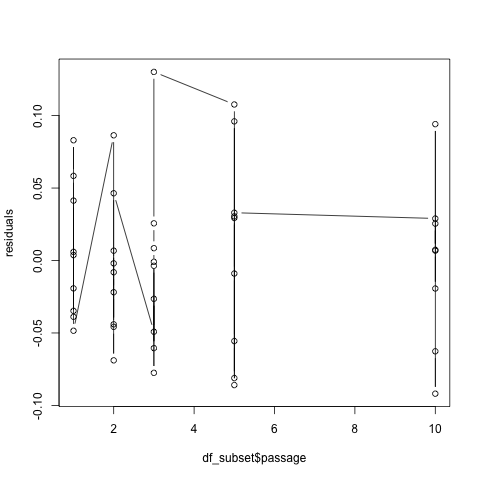

In [105]:
%%R

plot(df_subset$passage, residuals, type = "b")


In [106]:
%%R

check_autocorrelation(lm_model)

OK: Residuals appear to be independent and not autocorrelated (p = 0.070).

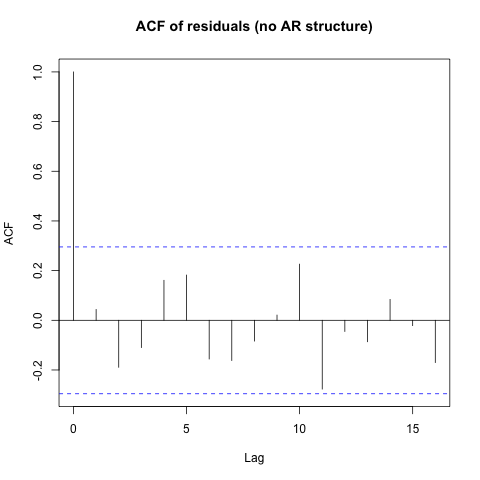

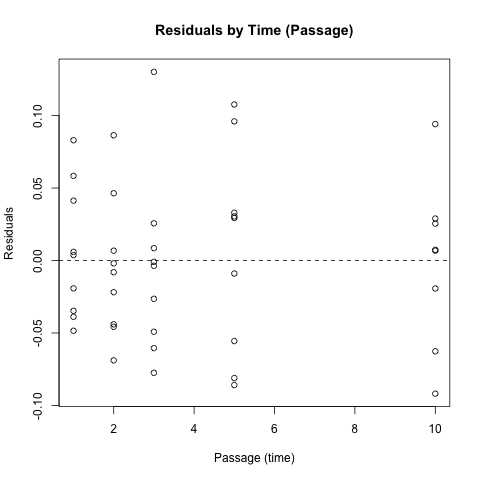

In [107]:
%%R

# 2. Extract residuals and the time variable (passage)
resid_vals <- resid(lm_model)
passage_num <- as.numeric(as.character(df_subset$passage)) # Make sure passage is numeric for acf

# 3. Plot residual autocorrelation
acf(resid_vals, main = "ACF of residuals (no AR structure)")

# 4. Optional: Plot residuals over time
plot(passage_num, resid_vals,
     main = "Residuals by Time (Passage)",
     xlab = "Passage (time)", ylab = "Residuals")
abline(h=0, lty=2)


In [108]:
### --> there is no indicaiton for autocorrelation  

### model accounting for autocorrelation

In [243]:
%%R 
library(nlme)

model <- lme(pi_log ~ passage + genotype + passage:genotype, 
                random =~ 1 | replicate,
                weights = varIdent(form = ~ 1 | passage), 
                correlation = corARMA(form = ~ passage | replicate, p = 0, q = 1),
                method = "ML",
                data = df_subset)

summary(model)

Linear mixed-effects model fit by maximum likelihood
  Data: df_subset 
        AIC       BIC   logLik
  -96.73194 -73.53748 61.36597

Random effects:
 Formula: ~1 | replicate
        (Intercept)   Residual
StdDev:  0.01997076 0.03232941

Correlation Structure: ARMA(0,1)
 Formula: ~passage | replicate 
 Parameter estimate(s):
   Theta1 
0.4936086 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | passage 
 Parameter estimates:
       1        2        3        5       10 
1.000000 1.846114 2.311524 2.483062 1.999447 
Fixed effects:  pi_log ~ passage + genotype + passage:genotype 
                      Value  Std.Error DF    t-value p-value
(Intercept)       -3.636759 0.02539211 32 -143.22396  0.0000
passage            0.016164 0.00566946 32    2.85103  0.0076
genotypeI          0.005332 0.03564018  6    0.14960  0.8860
genotypeK         -0.059696 0.03564018  6   -1.67496  0.1450
passage:genotypeI -0.002653 0.00747520 32   -0.35489  0.7250
passage:g

In [231]:
%%R

# we don't have so much data
# hence removing the interaction term, we have more power (less parameters to fit)
simplified_model <- lme(pi_log ~ passage + genotype, 
                random =~ 1 | replicate,
                weights = varIdent(form = ~ 1 | passage), 
                correlation = corARMA(form = ~ passage | replicate, p = 0, q = 1),
                method = "ML",
                data = df_subset)

# Analysis of model
summary(simplified_model)

# p-values are intentionally not shown because there is ongoing statistical debate about 
# how to calculate appropriate p-values for these models
# The t-values (values > |2| suggest statistical significance)

Linear mixed-effects model fit by maximum likelihood
  Data: df_subset 
        AIC       BIC   logLik
  -100.4468 -80.82068 61.22338

Random effects:
 Formula: ~1 | replicate
        (Intercept)   Residual
StdDev:  0.02005856 0.03076377

Correlation Structure: ARMA(0,1)
 Formula: ~passage | replicate 
 Parameter estimate(s):
   Theta1 
0.4794485 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | passage 
 Parameter estimates:
       1        2        3        5       10 
1.000000 1.933377 2.430169 2.589181 2.240380 
Fixed effects:  pi_log ~ passage + genotype 
                Value   Std.Error DF    t-value p-value
(Intercept) -3.635038 0.020964273 34 -173.39203  0.0000
passage      0.015610 0.002966713 34    5.26171  0.0000
genotypeI   -0.002662 0.027635569  6   -0.09632  0.9264
genotypeK   -0.056313 0.027635569  6   -2.03770  0.0877
 Correlation: 
          (Intr) passag gntypI
passage   -0.346              
genotypeI -0.655 -0.037       
genoty

In [232]:
%%R 

# compare the two models
anova(simplified_model, model)

# If the comparison shows no significant difference between models, 
# the simpler model without interaction terms would be preferred.

# --> no significant difference 
# --> simpler model is prefered, has also more defrees of freedom 

                 Model df       AIC       BIC   logLik   Test  L.Ratio p-value
simplified_model     1 11 -100.4468 -80.82068 61.22338                        
model                2  9 -101.1728 -85.11513 59.58642 1 vs 2 3.273934  0.1946


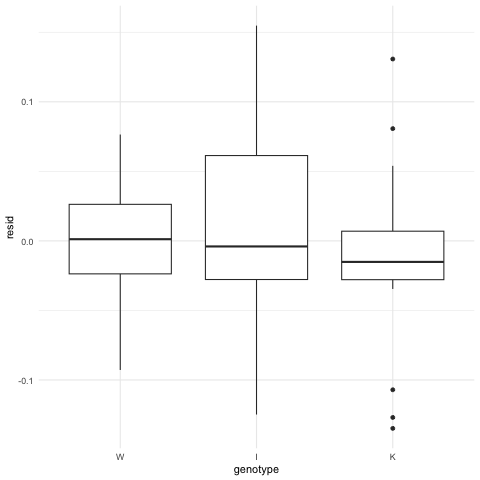

In [233]:
%%R

library(ggplot2)
df_subset$resid <- resid(simplified_model)
ggplot(df_subset, aes(x = genotype, y = resid)) + 
  geom_boxplot() +
  theme_minimal()

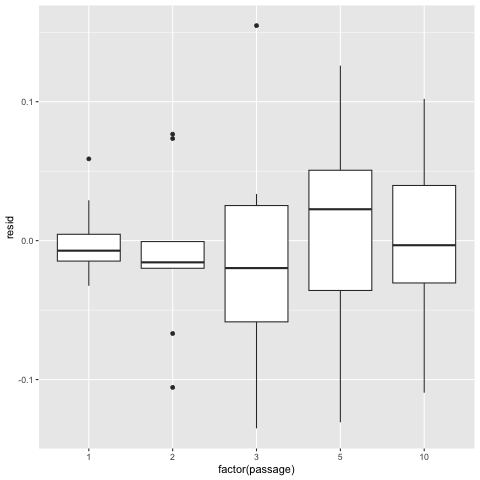

In [244]:
%%R
library(ggplot2)
df_subset$resid <- resid(model)
ggplot(df_subset, aes(x = factor(passage), y = resid)) + geom_boxplot()


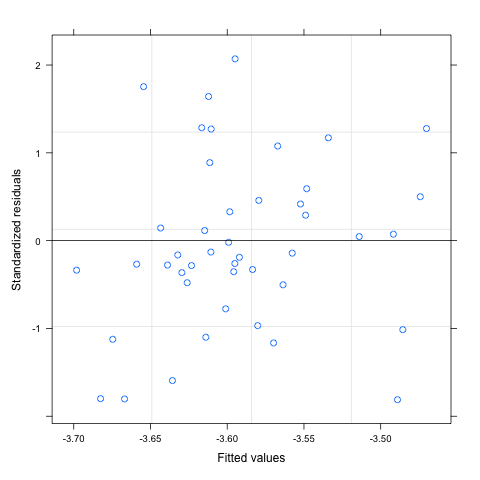

In [236]:
%%R

plot(simplified_model)


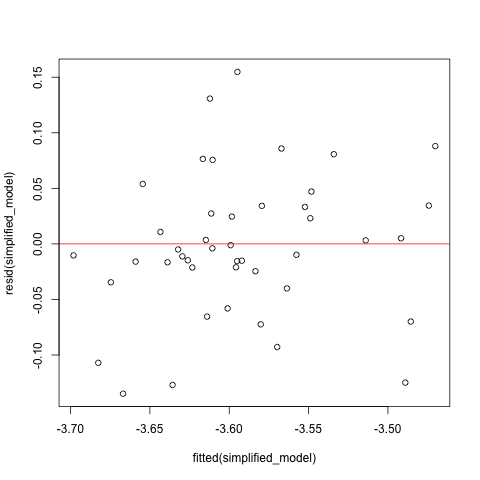

In [237]:
%%R

plot(fitted(simplified_model), resid(simplified_model))
abline(h = 0, col = "red")

In [238]:
%%R

library(car)
leveneTest(resid(simplified_model) ~ as.factor(passage), data = df_subset)


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  4  1.5146 0.2168
      39               


In [239]:
%%R
library(car)
leveneTest(resid(simplified_model) ~ interaction(as.factor(passage), as.factor(genotype)), data = df_subset)


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group 14  0.5737 0.8634
      29               


In [245]:
%%R

leveneTest(resid(simplified_model) ~ as.factor(genotype), data = df_subset)

Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  0.9957 0.3782
      41               


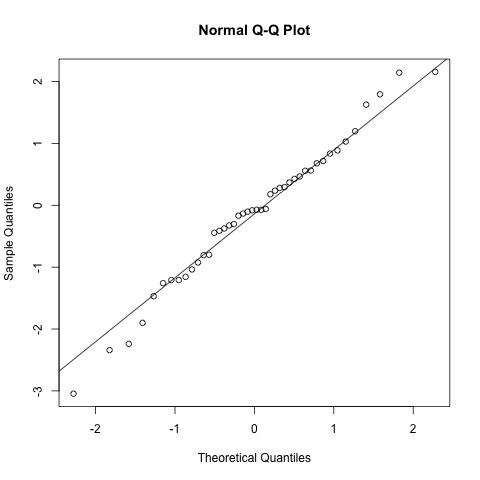

In [149]:
%%R 

qqnorm(resid(model_var_passage, type = "normalized"))
qqline(resid(model_var_passage, type = "normalized"))

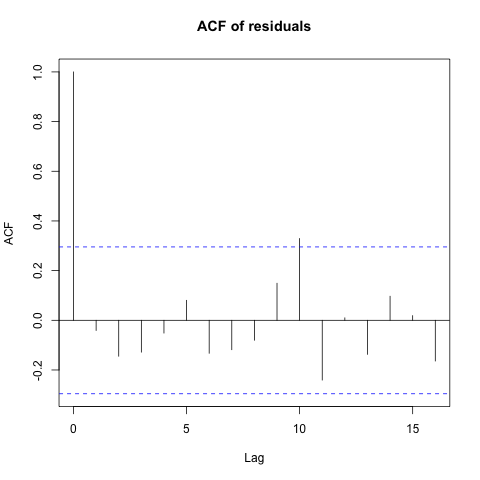

In [185]:
%%R
acf(resid(simplified_model, type="normalized"), main="ACF of residuals")

## CrPV

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_3056/1378948969.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='CrPV')],


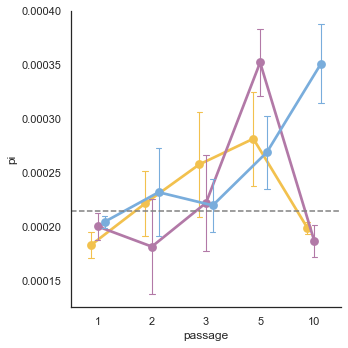

In [34]:
#sns.set_context("talk") 
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='CrPV')], 
                x='passage', 
                y='pi', 
                #row='rep', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                #linestyles='--',
                dodge=0.25,
                errorbar='se',
                palette=our_color_palette, 
                errwidth=1.1, 
                  capsize=0.1,
                legend=False, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--') 
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
g.savefig("/Users/lfuhrmann/Downloads/nucleotide_diversity.full_genome.crpv.pdf")

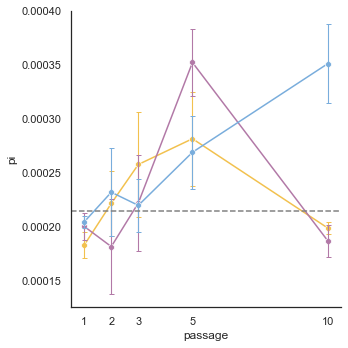

In [38]:
sns.set(rc={'figure.figsize':(5,6)})
sns.set_style('white')

g = sns.relplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='CrPV')], 
                x='passage', 
                kind='line', 
                y='pi', 
                #row='rep', 
                hue='genotype', 
                marker='o', 
                #linestyles='--',
                #dodge=0.25,
                palette=our_color_palette, 
                err_style="bars",
                errorbar='se',
                err_kws={"elinewidth": 1.1, "capsize": 2.5},
                legend=False, 
                )


# Add vertical line to specific subplots
for ax in g.axes.flat:
    ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--') 
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3


plt.xlim(df['passage'].min()-0.5, df['passage'].max()+0.5)
plt.xticks(sorted(df['passage'].unique()))
        
g.savefig("/Users/lfuhrmann/Downloads/nucleotide_diversity.full_genome.crpv.pdf")

In [12]:
%%R

df_subset <- subset(df_pi, measure == 'fullgenome')
df_subset <- subset(df_subset, virus == 'CrPV')
df_subset$pi_log <- log10(df_subset$pi)

# Relevel the genotype factor with W as reference
df_subset$genotype <- factor(df_subset$genotype)
df_subset$genotype <- relevel(df_subset$genotype, ref = "W")

In [13]:
%%R 

df_subset

    genotype rep passage virus    measure           pi replicate    pi_log
132        W   a       1  CrPV fullgenome 1.876139e-04    CrPVWa -3.726735
135        W   b       1  CrPV fullgenome 2.013794e-04    CrPVWb -3.695985
138        W   c       1  CrPV fullgenome 1.598453e-04    CrPVWc -3.796300
141        K   a       1  CrPV fullgenome 1.759099e-04    CrPVKa -3.754710
144        K   b       1  CrPV fullgenome 2.111945e-04    CrPVKb -3.675317
147        K   c       1  CrPV fullgenome 2.135050e-04    CrPVKc -3.670592
150        I   a       1  CrPV fullgenome 1.962713e-04    CrPVIa -3.707143
153        I   b       1  CrPV fullgenome 2.025266e-04    CrPVIb -3.693518
156        I   c       1  CrPV fullgenome 2.144179e-04    CrPVIc -3.668739
159        W   a       2  CrPV fullgenome 1.891340e-04    CrPVWa -3.723230
162        W   b       2  CrPV fullgenome 2.815623e-04    CrPVWb -3.550425
165        W   c       2  CrPV fullgenome 1.937781e-04    CrPVWc -3.712695
168        K   a       2 

In [14]:
%%R 

df_subset <- df_subset[order(df_subset$passage), ]


model <- lmer(pi_log ~ genotype +  passage + I(passage>=10)+ genotype:I(passage >= 10)+ (1|replicate),
              data = df_subset)
summary(model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
pi_log ~ genotype + passage + I(passage >= 10) + genotype:I(passage >=  
    10) + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -49.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04137 -0.45229  0.07875  0.49129  1.79420 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001066 0.03265 
 Residual              0.010041 0.10021 
Number of obs: 45, groups:  replicate, 9

Fixed effects:
                                Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                    -3.769205   0.046437 21.623841 -81.169  < 2e-16
genotypeI                      -0.002303   0.048828  8.079330  -0.047 0.963522
genotypeK                      -0.007813   0.048828  8.079330  -0.160 0.876801
passage                         0.046098   0.011292 32.000000   4.082 0.000278
I(passage >= 10)TRUE           -0.393850   0

In [15]:
%%R

residuals <- resid(model)

# Check if residuals are in the same order as time variable in the data
all(names(residuals) == rownames(df_subset))

[1] TRUE


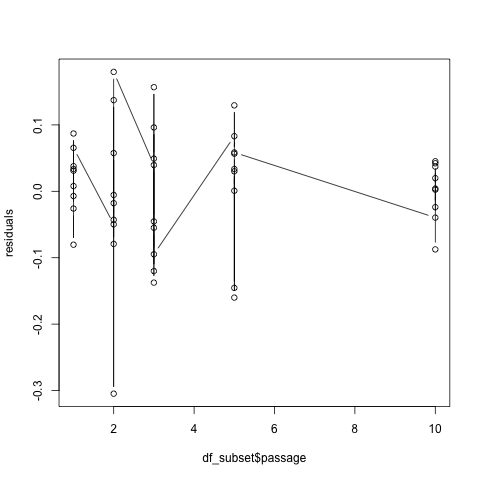

In [16]:
%%R

plot(df_subset$passage, residuals, type = "b")


In [19]:
%%R
library(performance)
check_autocorrelation(model)

OK: Residuals appear to be independent and not autocorrelated (p = 0.390).

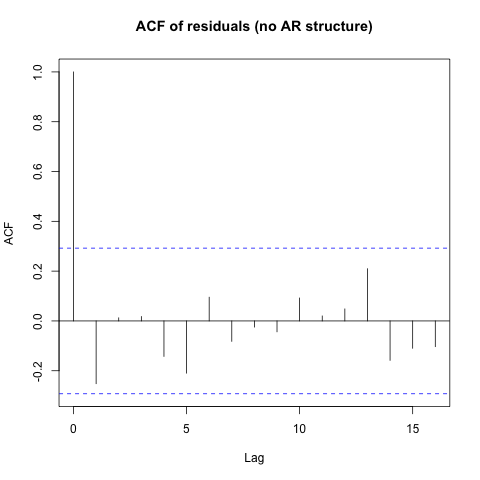

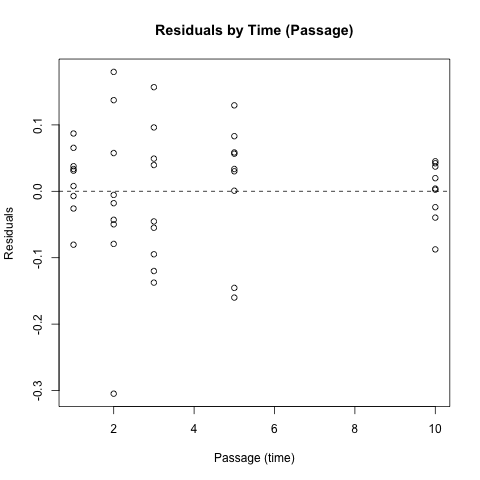

In [20]:
%%R

# 2. Extract residuals and the time variable (passage)
resid_vals <- resid(model)
passage_num <- as.numeric(as.character(df_subset$passage)) # Make sure passage is numeric for acf

# 3. Plot residual autocorrelation
acf(resid_vals, main = "ACF of residuals (no AR structure)")

# 4. Optional: Plot residuals over time
plot(passage_num, resid_vals,
     main = "Residuals by Time (Passage)",
     xlab = "Passage (time)", ylab = "Residuals")
abline(h=0, lty=2)

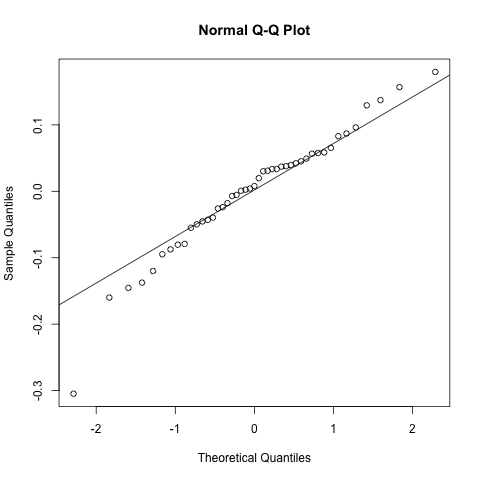

In [21]:
%%R

# Check residuals
plot(model)
qqnorm(resid(model))
qqline(resid(model))

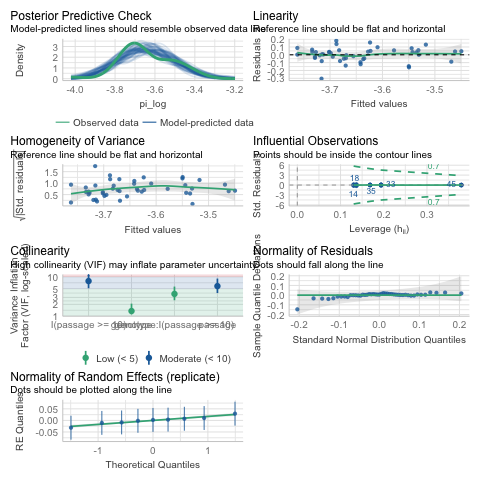

In [22]:
%%R

# Check model assumptions
library(performance)
check_model(model)

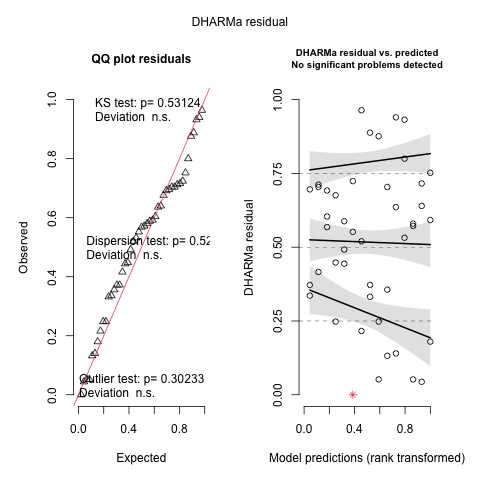

In [23]:
%%R

library(DHARMa)
simulationOutput <- simulateResiduals(model)
plot(simulationOutput)

In [ ]:
## now lets see how the model is with autocorrelation 

In [24]:
%%R
library(nlme)

df_subset <- df_subset[order(df_subset$passage), ]

model_ac <- lme(pi_log ~ genotype + passage + I(passage >= 10) + genotype:I(passage >= 10),
                random = ~ 1 | replicate,
                correlation = corAR1(form = ~ passage | replicate),
                data = df_subset)

summary(model_ac)


Linear mixed-effects model fit by REML
  Data: df_subset 
        AIC       BIC   logLik
  -29.49382 -13.11796 24.74691

Random effects:
 Formula: ~1 | replicate
        (Intercept)  Residual
StdDev:  0.02670625 0.1021817

Correlation Structure: ARMA(1,0)
 Formula: ~passage | replicate 
 Parameter estimate(s):
     Phi1 
0.1265929 
Fixed effects:  pi_log ~ genotype + passage + I(passage >= 10) + genotype:I(passage >=      10) 
                                   Value  Std.Error DF   t-value p-value
(Intercept)                    -3.769689 0.04821805 32 -78.18004  0.0000
genotypeI                      -0.002953 0.04953317  6  -0.05961  0.9544
genotypeK                      -0.001144 0.04953317  6  -0.02309  0.9823
passage                         0.045830 0.01169104 32   3.92011  0.0004
I(passage >= 10)TRUE           -0.390689 0.10717639 32  -3.64529  0.0009
genotypeI:I(passage >= 10)TRUE  0.245104 0.09454445 32   2.59247  0.0142
genotypeK:I(passage >= 10)TRUE -0.027756 0.09454445 32  -0


Attache Paket: ‘nlme’

Das folgende Objekt ist maskiert ‘package:lme4’:

    lmList



In [25]:
%%R
library(performance)
check_autocorrelation(model)


OK: Residuals appear to be independent and not autocorrelated (p = 0.404).

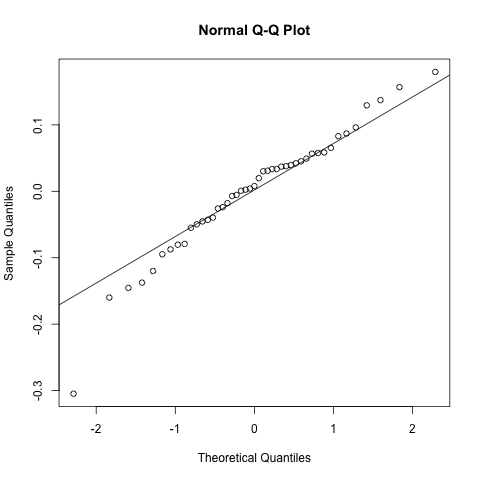

In [26]:
%%R

# Check residuals
plot(model)
qqnorm(resid(model))
qqline(resid(model))

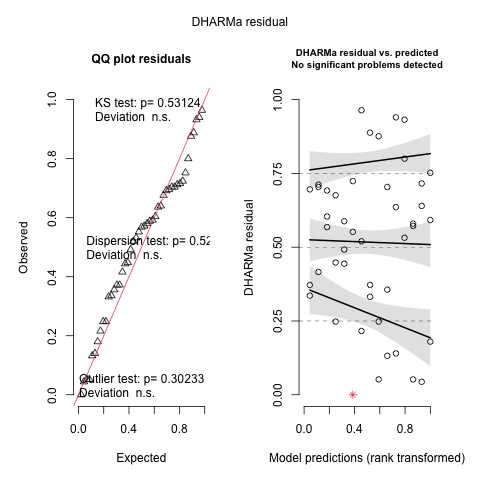

In [27]:
%%R

library(DHARMa)
simulationOutput <- simulateResiduals(model)
plot(simulationOutput)

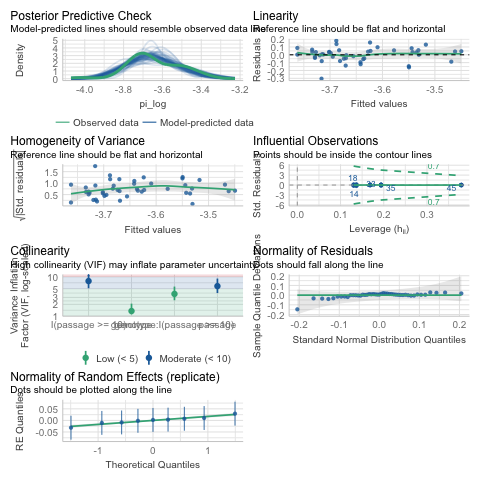

In [28]:
%%R

# Check model assumptions
library(performance)
check_model(model)